# Monte Carlo Method

In [92]:
import random
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [93]:
states = ['s_down', 's_-2', 's_-1', 's_0', 's_1', 's_2', 's_up'] 
state0 = 's_0'

In [94]:
def reward(state):
    return 1 if state == 's_up' else 0

In [95]:
def environment(state, action):
    state_idx = states.index(state)
    if action == 'left':
        new_state = states[state_idx - 1]
    else:
        new_state = states[state_idx + 1]
    
    return new_state, reward(new_state)


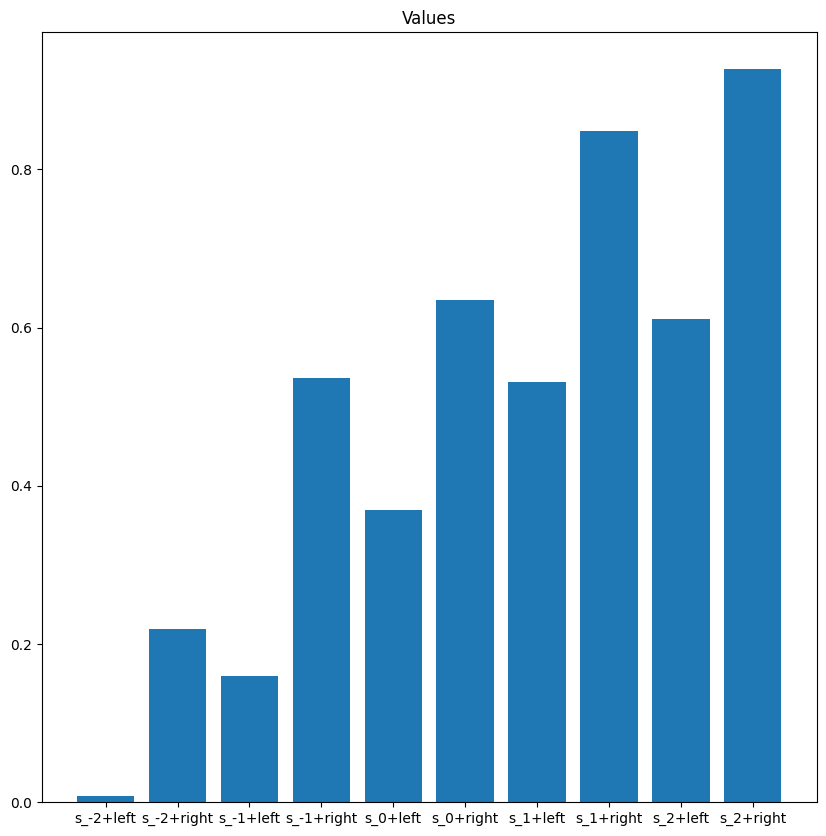

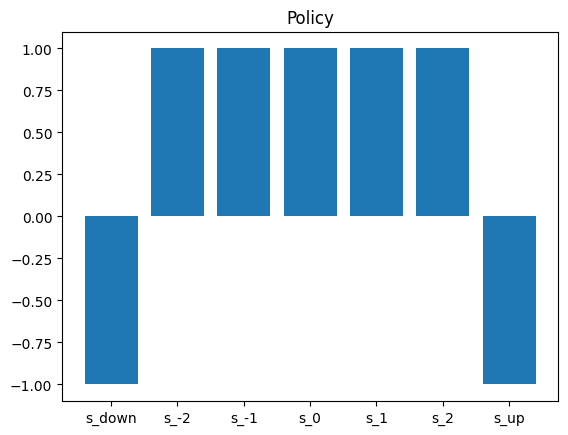

In [97]:
# policy variable to be updated after every episode
policy = {s: 0 for s in states}

# initialize Q(s,a): state action values
V = {}
for s in states[1:-1]:
    V[s + '+' + 'left'] = 0.1
    V[s + '+' + 'right'] = 0.1
 
alpha = 0.05
for i in range(100):

    # Generate an sample
    episode = []
    state = state0
    while state != 's_up' and state != 's_down':
        action = random.choice(['left', 'right'])
        next_state, reward_val = environment(state, action)
        episode.append((state, action, reward_val))

        state = next_state


    G = 0 # total return in the sample
    visited_state_action_set = set()
    return_dict = {} # state+action : Return
    for state, action, reward_val in reversed(episode):
    # for state, action, reward_val in episode: # TODO: why reverse???

        G = reward_val + 1*G
        state_action_str = state + '+' + action
        if state_action_str not in visited_state_action_set: # only first visit MC
            if return_dict.get(state_action_str) == None:
                return_dict[state_action_str] = []
            return_dict[state_action_str].append(G) # if in (S state ,A action taken) is reached, this is the return
            visited_state_action_set.add(state_action_str)


    # Update Q(s,a) after every sample    
    for key, value in return_dict.items():
        V[key] = V[key] + alpha * (np.mean(value) - V[key]) 
    
    # Update the policy: being greedy on Q(s,a)
    for s in states:
        left_s_val = V.get(s +  '+' +'left') or 0
        right_s_val = V.get(s + '+' + 'right') or 0

        if right_s_val > left_s_val:
            policy[s]  = +1
        else:
            policy[s] = -1


    clear_output(wait=True)
    plt.figure(figsize=(10, 10))
    plt.bar(list(V.keys()), list(V.values())); plt.title('Values')
    plt.show()

    plt.bar(states, list(policy.values())); plt.title('Policy')
    plt.show()

    